In [1]:
import datetime
import pandas as pd
from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import GOOG
import talib


class RsiOscillator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # Do as much initial computation as possible
    def init(self):
        self.rsi = self.I(talib.RSI, self.data.Close, self.rsi_window)


    # Step through bars one by one
    # Note that multiple buys are a thing here

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()


bt = Backtest(GOOG, RsiOscillator, cash=10_000)
stats,heatmap = bt.optimize(upper_bound = range(55,85,5),lower_bound = range(10,45,5), 
                    rsi_window = range(10,30,2) , maximize = 'Sharpe Ratio',
                    constraint= lambda param: param.upper_bound > param.lower_bound,
                    return_heatmap=True)
stats

/opt/miniconda3/envs/newBase/lib/python3.12/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/opt/miniconda3/envs/newBase/lib/python3.12/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/opt/miniconda3/envs/newBase/lib/python3.12/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()
/opt

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   62.662942
Equity Final [$]                     45486.35
Equity Peak [$]                      45573.15
Return [%]                           354.8635
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.448742
Volatility (Ann.) [%]               32.629176
Sharpe Ratio                         0.596054
Sortino Ratio                        1.122836
Calmar Ratio                          0.35036
Max. Drawdown [%]                  -55.510789
Avg. Drawdown [%]                   -4.037504
Max. Drawdown Duration      548 days 00:00:00
Avg. Drawdown Duration       34 days 00:00:00
# Trades                                   17
Win Rate [%]                        76.470588
Best Trade [%]                      41.689994
Worst Trade [%]                    -27.637707
Avg. Trade [%]                    

In [11]:
type(stats)

backtesting._stats._Stats

In [12]:
stats["_strategy"]

<Strategy RsiOscillator(upper_bound=75,lower_bound=35,rsi_window=12)>

In [14]:
heatmap

upper_bound  lower_bound  rsi_window
55           10           10                 NaN
                          12                 NaN
                          14                 NaN
                          16                 NaN
                          18                 NaN
                                          ...   
80           40           20            0.425659
                          22            0.347583
                          24            0.359277
                          26            0.359277
                          28            0.390775
Name: Sharpe Ratio, Length: 420, dtype: float64

In [6]:
hm = heatmap.groupby(["upper_bound","lower_bound"]).mean().unstack()

In [7]:
hm

lower_bound,10,15,20,25,30,35,40
upper_bound,,,,,,,
55,NaN,NaN,0.207868,0.066544,0.126464,0.012004,0.079600
60,NaN,NaN,0.102218,0.066544,0.152110,0.066231,0.221557
65,NaN,NaN,0.111392,0.075202,0.144014,0.175194,0.339966
70,NaN,NaN,0.109964,0.139318,0.148199,0.288329,0.361304
75,NaN,NaN,0.199546,0.093909,0.278752,0.355710,0.431704
80,NaN,NaN,0.114829,0.196174,0.269226,0.365477,0.415632


In [11]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

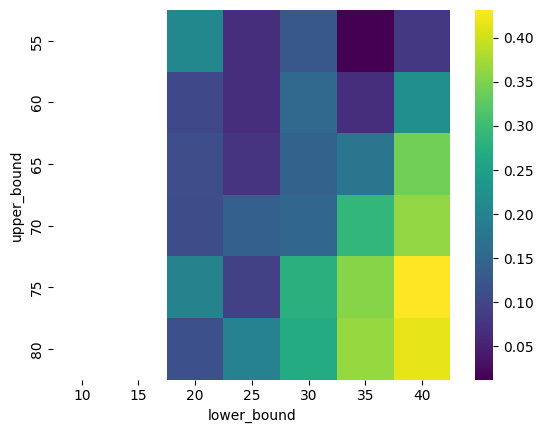

In [14]:
sns.heatmap(hm,cmap= "viridis")
plt.show()

In [15]:
from backtesting.lib import plot_heatmaps
plot_heatmaps(heatmap, agg="mean")

GridPlot(id='p1144', ...)